In [132]:
import pandas as pd
import numpy as np


In [133]:
#df = pd.read_csv('spam.csv')

df = pd.read_csv('spam.csv', encoding='latin-1')
sample_rows = df.sample(5)
print(sample_rows)

        v1                                                 v2 Unnamed: 2  \
2825   ham                                          Ok lor...        NaN   
647   spam  PRIVATE! Your 2003 Account Statement for shows...        NaN   
4550   ham  Great. Have a safe trip. Dont panic surrender ...        NaN   
3223   ham                  Sorry da thangam.it's my mistake.        NaN   
3350   ham                       At what time are you coming.        NaN   

     Unnamed: 3 Unnamed: 4  
2825        NaN        NaN  
647         NaN        NaN  
4550        NaN        NaN  
3223        NaN        NaN  
3350        NaN        NaN  


In [134]:
df.shape

(5572, 5)

## Data Cleaning/preprocessing

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [136]:
#droping last 3 colmns
df = df.drop(df.columns[[2,3,4]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [137]:
df.sample(5)

,v1,v2
1355,ham,Convey my regards to him
2063,spam,"URGENT! Your mobile No *********** WON a å£2,0..."
4117,ham,Watch lor. I saw a few swatch one i thk quite ...
1901,ham,"Sorry, I'll call later"
925,ham,"K, wait chikku..il send aftr &lt;#&gt; mins"


In [138]:
#renaming clmns
df = df.rename(columns={'v1': 'target', 'v2': 'message'})
df.sample(5)

,target,message
2593,ham,Tmr timin still da same wat cos i got lesson u...
638,ham,"What will we do in the shower, baby?"
3280,ham,I tot it's my group mate... Lucky i havent rep...
1785,ham,I dun believe u. I thk u told him.
3163,ham,TODAY is Sorry day.! If ever i was angry with ...


Encoding catagorical data i.e spam or not spam ti1's and 0's

In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target']=le.fit_transform(df['target'])
df.sample(5)

,target,message
1558,0,Message from . I am at Truro Hospital on ext. ...
3994,0,R u in this continent?
2174,0,See? I thought it all through
1538,0,Midnight at the earliest
661,0,Then mum's repent how?


In [140]:
#cheching for null values
df.isnull().sum()

target     0
message    0
dtype: int64

In [141]:
#check for duplicate values
df.duplicated().sum()

403

In [142]:
#removing duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

## DATA ANALYSIS

In [143]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

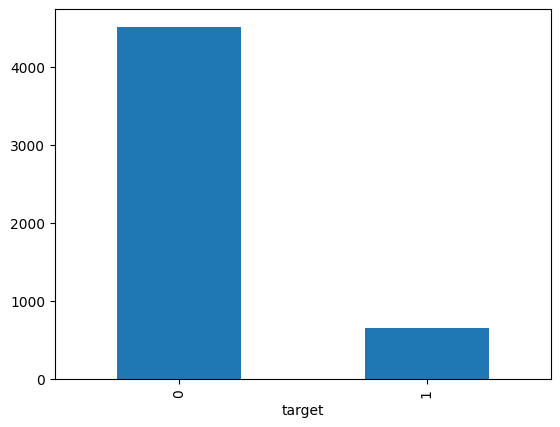

In [144]:
#visualizing the target colmn
import matplotlib.pyplot as plt


#visuaalizing ham and spam in one histogram 
df['target'].value_counts().plot(kind='bar')
plt.show()


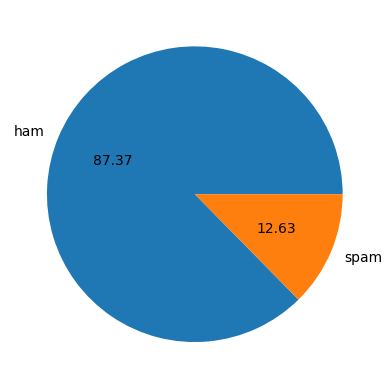

In [145]:
#representation in pie chart

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()


as data is imbalnced and we are using nltk for creating 3 colmns one for no. of chars one for #words and one for #sentences


In [146]:
import nltk
nltk.download('punkt')
df['#charachters']=df['message'].apply(len)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sudhanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [147]:
df.head()

,target,message,#charachters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [148]:
#number of words in each message
from nltk.tokenize import word_tokenize, sent_tokenize
df['#words']=df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [149]:
df.head()

,target,message,#charachters,#words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [150]:
#sentence count
df['#sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,message,#charachters,#words,#sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [151]:
#description for ham messages
df[df['target']==0][['#charachters', '#words', '#sentences']].describe()

,#charachters,#words,#sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [152]:
#description for spam messages
df[df['target']==1][['#charachters', '#words', '#sentences']].describe()

,#charachters,#words,#sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='#charachters', ylabel='Count'>

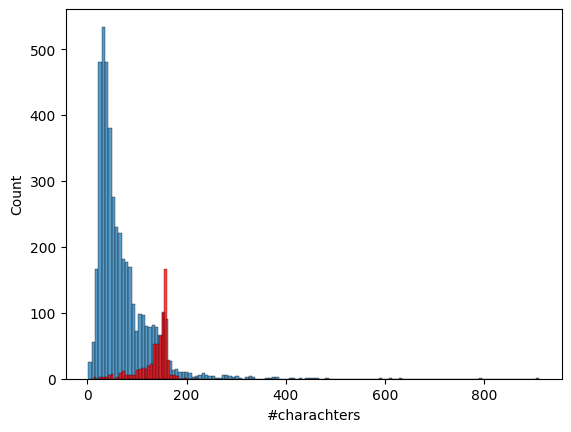

In [153]:
# import seaborn as sns
# #visualizing the charachters in ham and spam messages
# sns.histplot(df[df['target']==0]['#charachters'], label='ham')
# sns.histplot(df[df['target']==1]['#charachters'],  color='red', label='spam')


<Axes: xlabel='#words', ylabel='Count'>

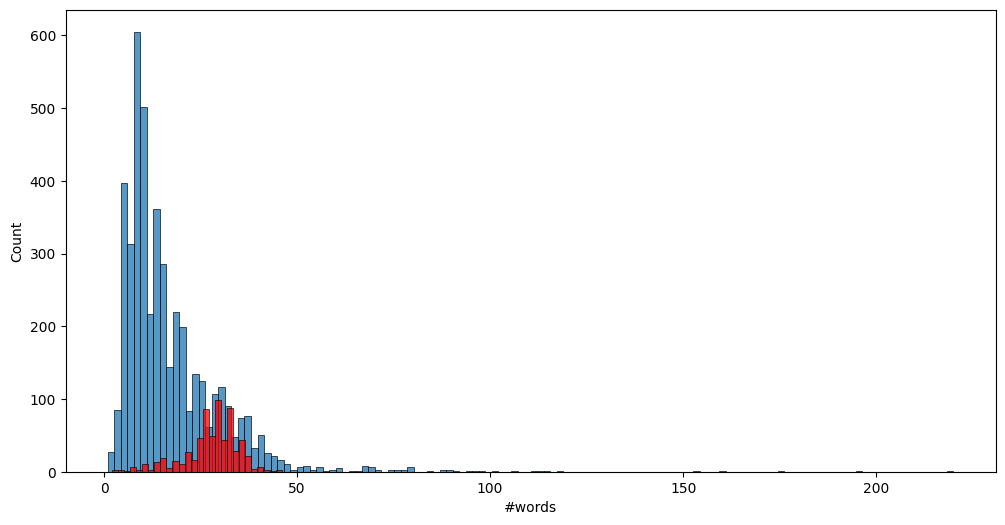

In [154]:
# #visualizing the words in ham and spam messages
# plt.figure(figsize=(12, 6))
# sns.histplot(df[df['target']==0]['#words'], label='ham')
# sns.histplot(df[df['target']==1]['#words'],  color='red', label='spam')


<Axes: xlabel='#sentences', ylabel='Count'>

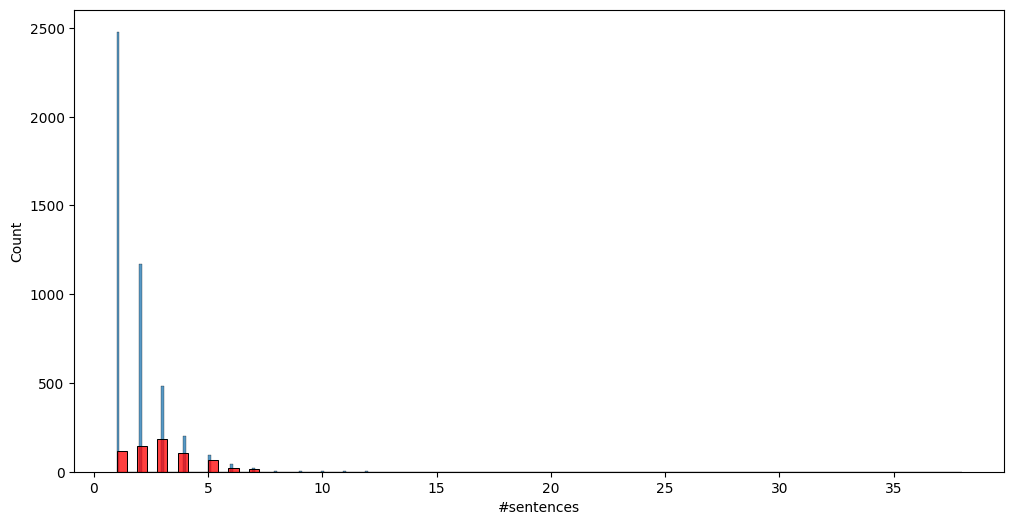

In [155]:
# #visualizing the sentences in ham and spam messages
# plt.figure(figsize=(12, 6))
# sns.histplot(df[df['target']==0]['#sentences'], label='ham')
# sns.histplot(df[df['target']==1]['#sentences'],  color='red', label='spam')

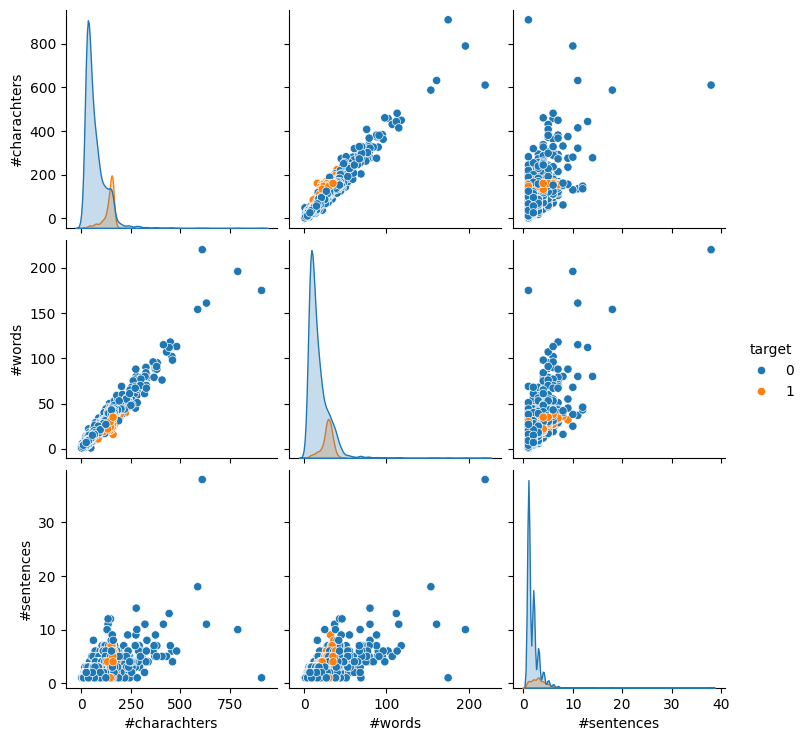

In [156]:
# #visualising correlation of features
# sns.pairplot(df, hue='target')


In [157]:
# # Assuming 'column_name' is the column containing the string values
# df['message'] = pd.to_numeric(df['message'], errors='coerce')
# #df = df.dropna()  # Drop rows with NaN values
# correlation_matrix = df.corr()


In [158]:
# df.corr()

In [159]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(df.corr(), annot=True)

## TEXT PREPROCESSING
- all lower case
- tokenization
- remove special chars
- remove stopwords/punctuation
- stemming

In [179]:
#text preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def text_preprocessing(message):
    if isinstance(message, str):
        # Convert to lowercase
        message = message.lower()
        # Tokenization with preservation of spaces
        message = ' '.join([word for word in nltk.word_tokenize(message)])
        # Remove special characters
        message = ''.join([char for char in message if char.isalnum()])
        # Remove punctuation
        message = ''.join([char for char in message if char not in string.punctuation])
        # Remove stopwords
        message = ' '.join([word for word in message.split() if word.lower() not in stopwords.words('english')])
        # Stemming
        message = ' '.join([PorterStemmer().stem(word) for word in message.split()])
        return message
    else:
        return ''

df['processed_message'] = df['message'].apply(text_preprocessing)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sudhanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,message,#charachters,#words,#sentences,processed_message,processed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,gountiljurongpointcrazyavailableonlyinbugisngr...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,oklarjokingwifuoni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,freeentryin2awklycomptowinfacupfinaltkts21stma...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,udunsaysoearlyhorucalreadythensay,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nahidontthinkhegoestousfhelivesaroundherethough,nah dont think goe usf live around though


In [176]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# import string
# ps = PorterStemmer()
# def text_preprocessing(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     y = []
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         y.append(ps.stem(i))
    
            
#     return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sudhanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
# df['processed_msg'] = df['message'].apply(text_preprocessing)
# df.head()

,target,message,#charachters,#words,#sentences,processed_message,processed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,gountiljurongpointcrazyavailableonlyinbugisngr...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,oklarjokingwifuoni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,freeentryin2awklycomptowinfacupfinaltkts21stma...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,udunsaysoearlyhorucalreadythensay,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nahidontthinkhegoestousfhelivesaroundherethough,nah dont think goe usf live around though


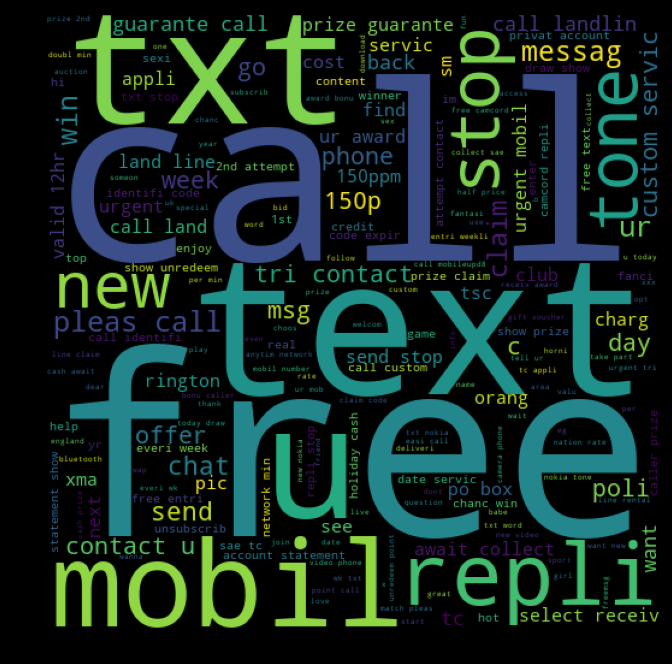

In [180]:
#wordcloud of spam msgs
from wordcloud import WordCloud
spam_words = ' '.join(list(df[df['target']==1]['processed_msg']))
spam_wordcloud = WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(spam_wordcloud)


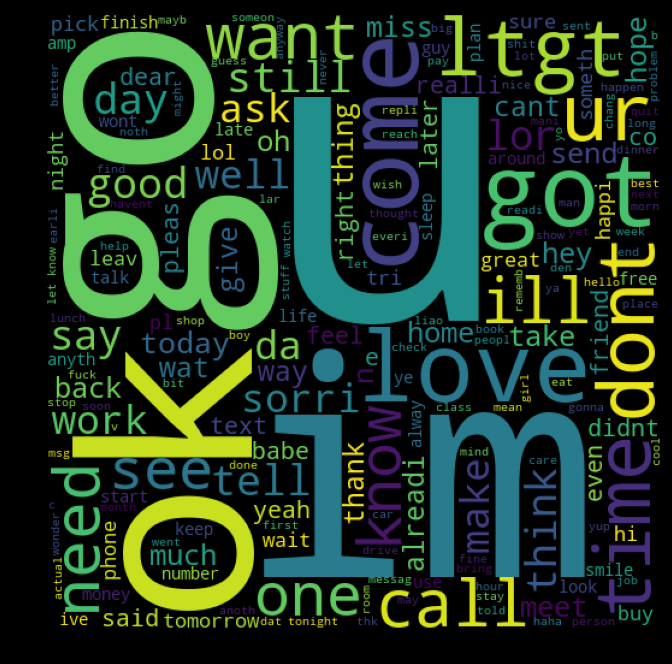

In [181]:
#wordcloud of ham msgs
ham_words = ' '.join(list(df[df['target']==0]['processed_msg']))
ham_wordcloud = WordCloud(width=512, height=512).generate(ham_words)
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(ham_wordcloud)


In [182]:
df.head()

,target,message,#charachters,#words,#sentences,processed_message,processed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,gountiljurongpointcrazyavailableonlyinbugisngr...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,oklarjokingwifuoni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,freeentryin2awklycomptowinfacupfinaltkts21stma...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,udunsaysoearlyhorucalreadythensay,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nahidontthinkhegoestousfhelivesaroundherethough,nah dont think goe usf live around though
